In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Explorative Analysis

In [16]:
tickers = [
    "AAPL", "MSFT", "TSLA",
    "JPM",
    "NVDA",
]

# Fetch historical data for each ticker
data_list = []  # List to store DataFrames
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data = stock.history(period="10y")  # Retrieve 10 years of historical data
    data['Ticker'] = ticker  # Add ticker name as a column
    data_list.append(data)

In [17]:
data_list

[                                 Open        High         Low       Close  \
 Date                                                                        
 2015-02-20 00:00:00-05:00   28.724405   28.920935   28.597110   28.920935   
 2015-02-23 00:00:00-05:00   29.037064   29.702579   28.956666   29.702579   
 2015-02-24 00:00:00-05:00   29.689181   29.836578   29.293890   29.517218   
 2015-02-25 00:00:00-05:00   29.380994   29.389929   28.619445   28.762375   
 2015-02-26 00:00:00-05:00   28.762363   29.226885   28.275511   29.126389   
 ...                               ...         ...         ...         ...   
 2025-02-12 00:00:00-05:00  231.199997  236.960007  230.679993  236.869995   
 2025-02-13 00:00:00-05:00  236.910004  242.339996  235.570007  241.529999   
 2025-02-14 00:00:00-05:00  241.250000  245.550003  240.990005  244.600006   
 2025-02-18 00:00:00-05:00  244.149994  245.179993  241.839996  244.470001   
 2025-02-19 00:00:00-05:00  244.610001  246.009995  243.160400  

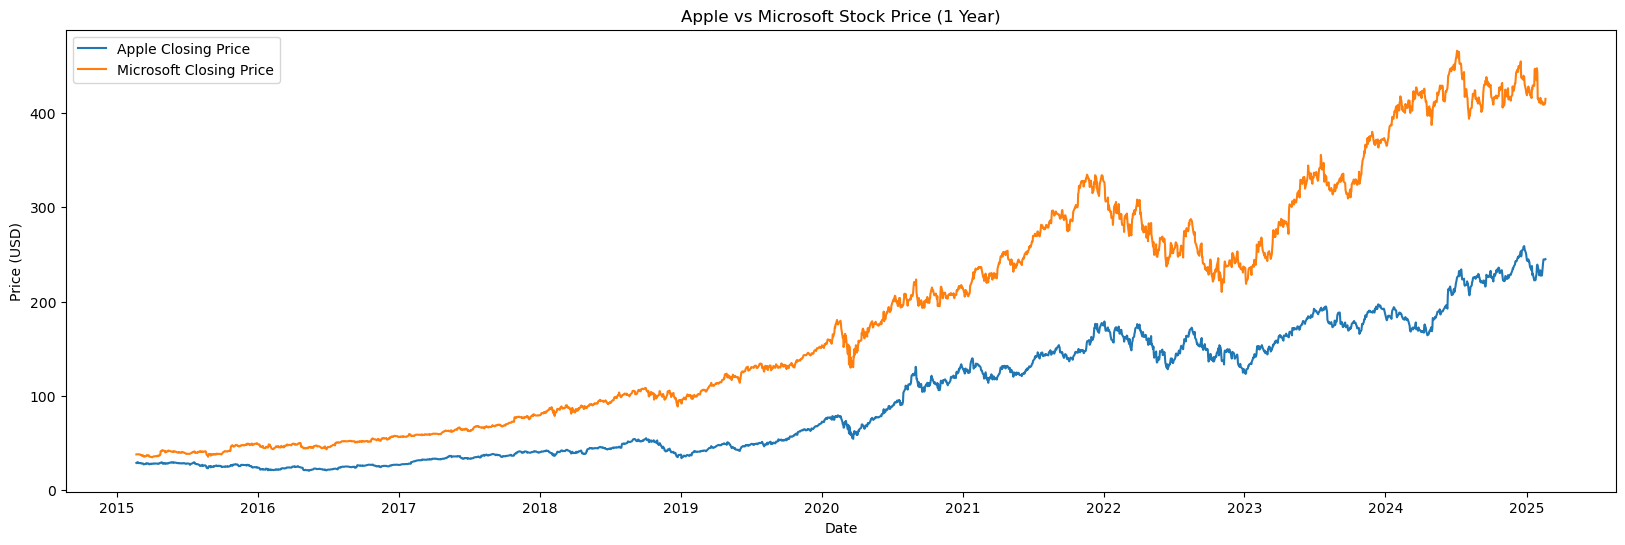

In [18]:
apple = data_list[0]
microsoft = data_list[1]

plt.figure(figsize=(20, 6))

plt.plot(apple.index, apple['Close'], label='Apple Closing Price')
plt.plot(microsoft.index, microsoft['Close'], label='Microsoft Closing Price')

plt.title('Apple vs Microsoft Stock Price (1 Year)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
#plt.grid(True)
plt.show()

### MACD (Moving average convergence divergence)

For APPL:

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/907182549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MACD for {data["Ticker"][0]} (2023)')


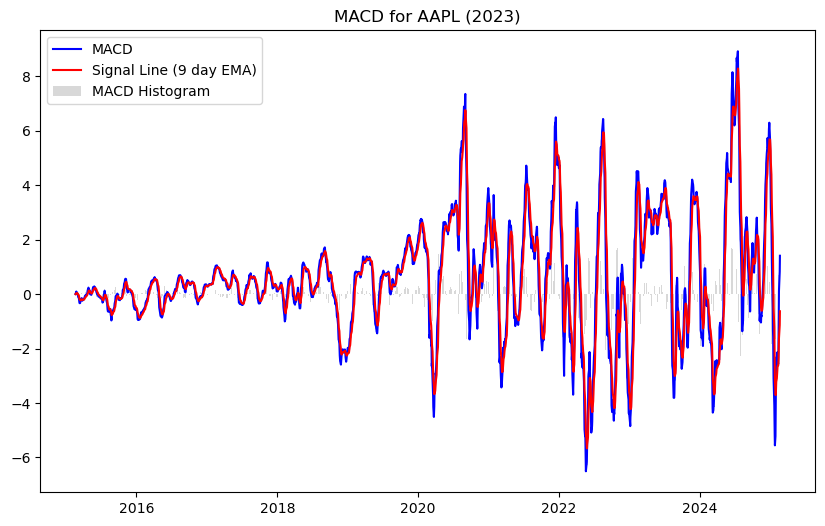

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/907182549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MACD for {data["Ticker"][0]} (2023)')


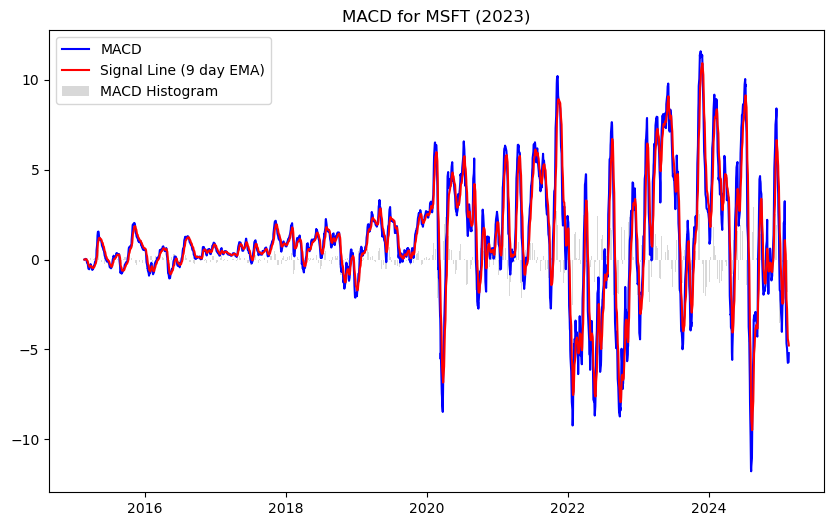

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/907182549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MACD for {data["Ticker"][0]} (2023)')


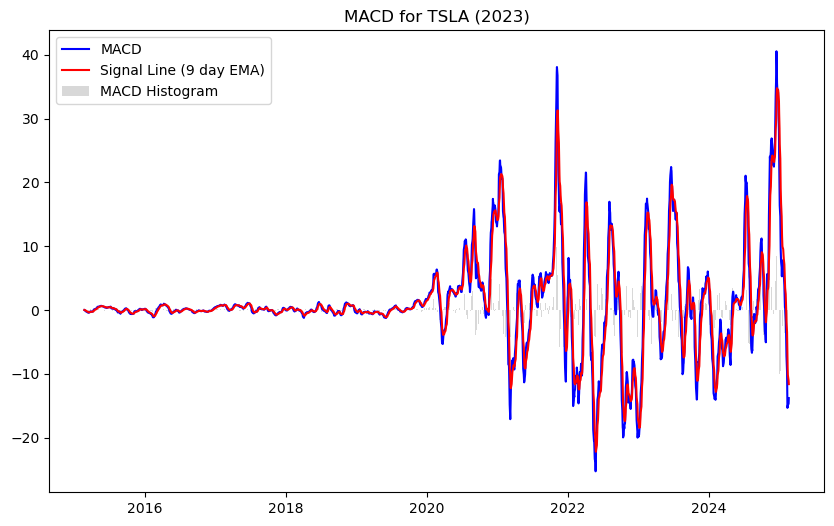

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/907182549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MACD for {data["Ticker"][0]} (2023)')


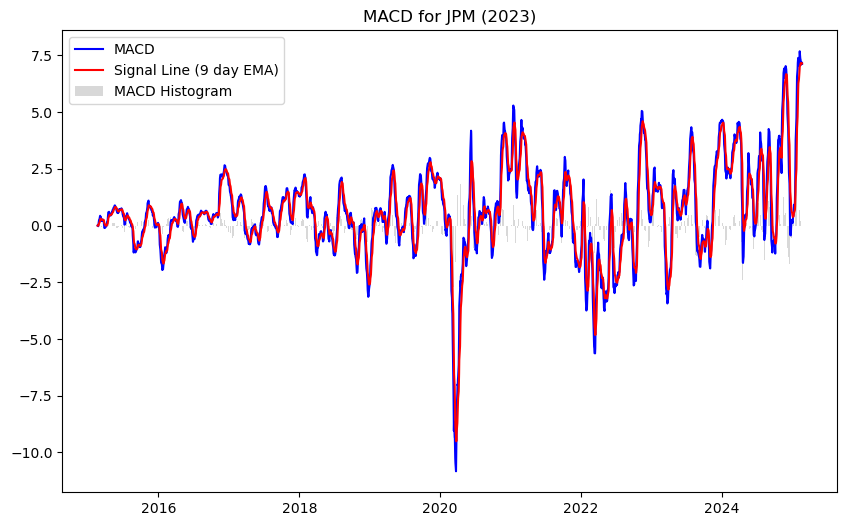

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/907182549.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MACD for {data["Ticker"][0]} (2023)')


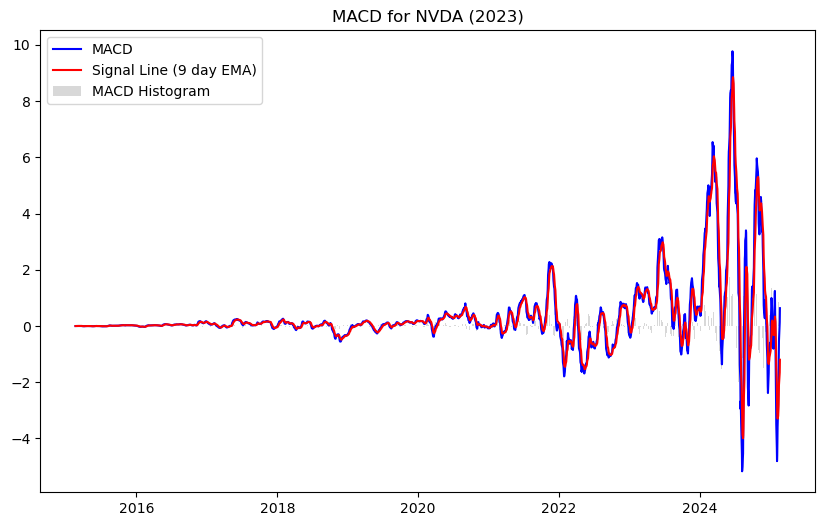

In [19]:
#for data in data_list:
for data in data_list:
    data['12-day EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['26-day EMA'] = data['Close'].ewm(span=26, adjust=False).mean()

    data['MACD'] = data['12-day EMA'] - data['26-day EMA']
    data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['MACD Histogram'] = data['MACD'] - data['Signal Line']

    plt.figure(figsize=(10, 6))

    # Plot the MACD and Signal Line
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['Signal Line'], label='Signal Line (9 day EMA)', color='red')

    # Plot the MACD Histogram
    plt.bar(data.index, data['MACD Histogram'], label='MACD Histogram', color='gray', alpha=0.3)

    plt.title(f'MACD for {data["Ticker"][0]} (2023)')
    plt.legend(loc='best')
    plt.show()

### RSI (Relative Strength Index)

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/2105662646.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'RSI for {data["Ticker"][0]} (14-day)')


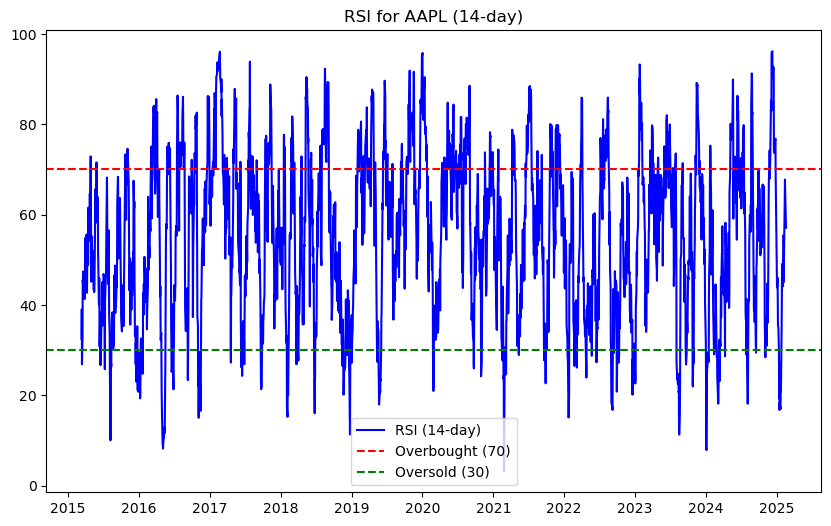

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/2105662646.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'RSI for {data["Ticker"][0]} (14-day)')


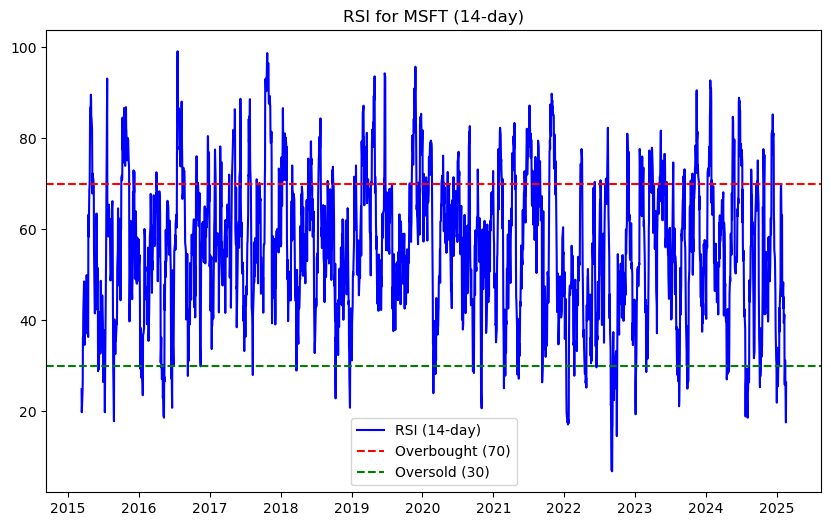

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/2105662646.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'RSI for {data["Ticker"][0]} (14-day)')


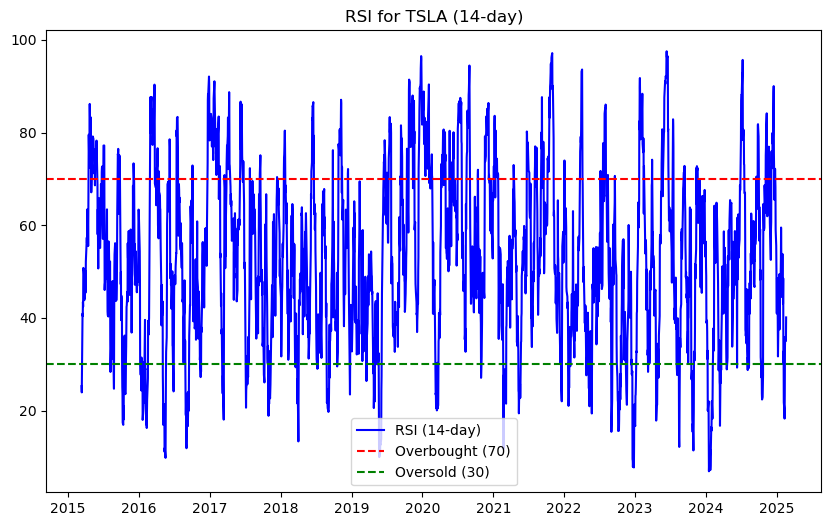

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/2105662646.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'RSI for {data["Ticker"][0]} (14-day)')


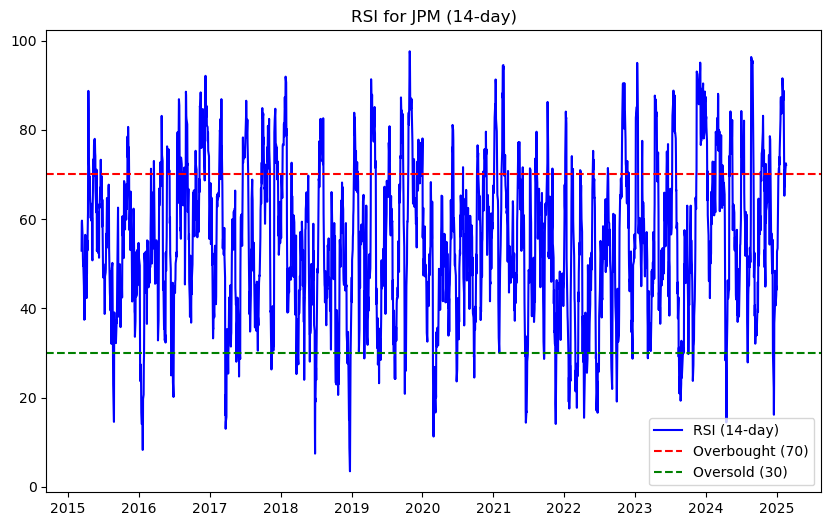

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/2105662646.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'RSI for {data["Ticker"][0]} (14-day)')


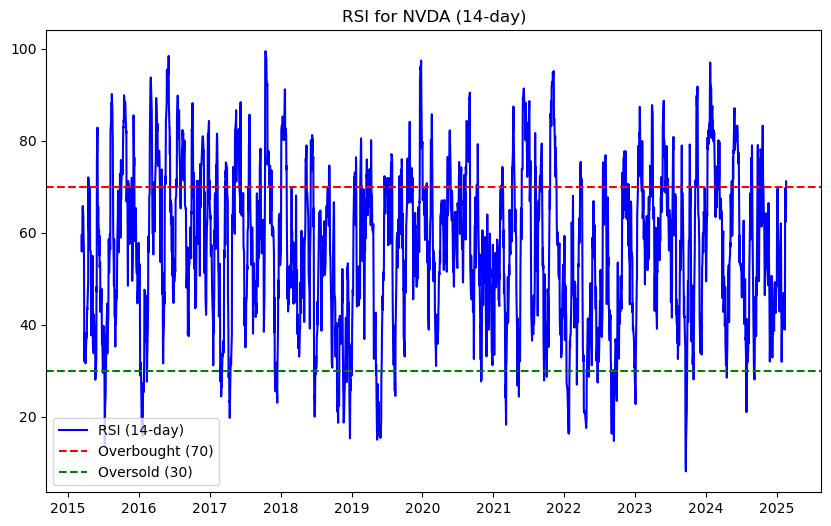

In [20]:
for data in data_list:
    data['Price Change'] = data['Close'].diff()
    data['Gain'] = data['Price Change'].where(data['Price Change'] > 0, 0)
    data['Loss'] = -data['Price Change'].where(data['Price Change'] < 0, 0)
    period = 14
    data['Avg Gain'] = data['Gain'].rolling(window=period).mean()
    data['Avg Loss'] = data['Loss'].rolling(window=period).mean()
    data['RS'] = data['Avg Gain'] / data['Avg Loss']
    data['RSI'] = 100 - (100 / (1 + data['RS']))

    plt.figure(figsize=(10, 6))
    plt.plot(data['RSI'], label='RSI (14-day)', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'RSI for {data["Ticker"][0]} (14-day)')
    plt.legend(loc='best')
    plt.show()


### OBV (On Balance Volume)

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Closing Price for {data["Ticker"][0]}')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

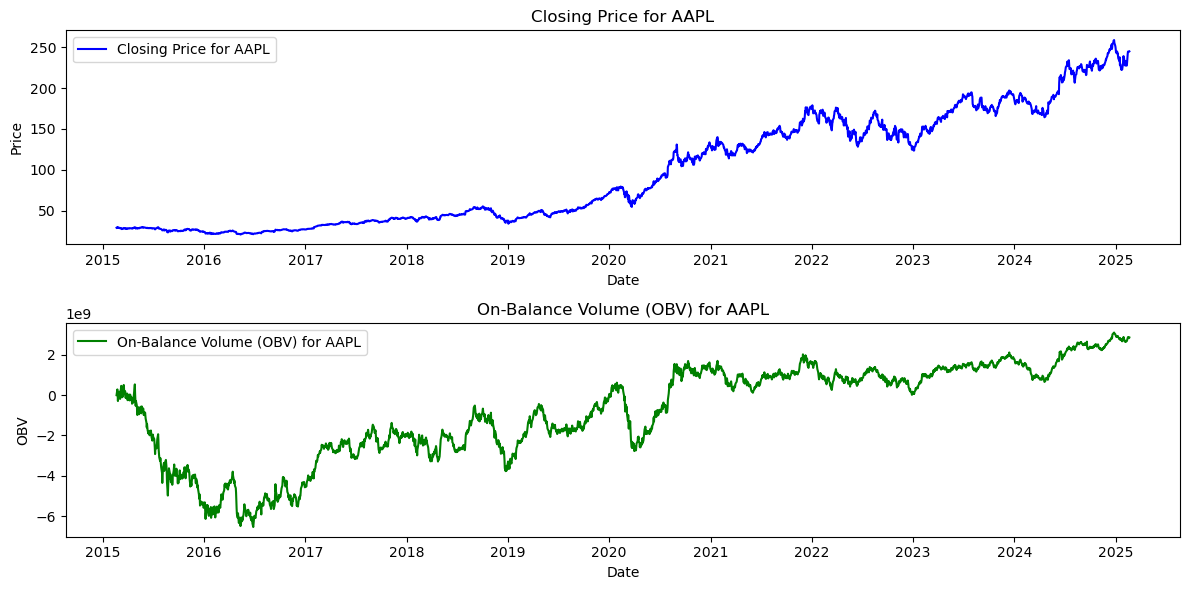

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Closing Price for {data["Ticker"][0]}')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

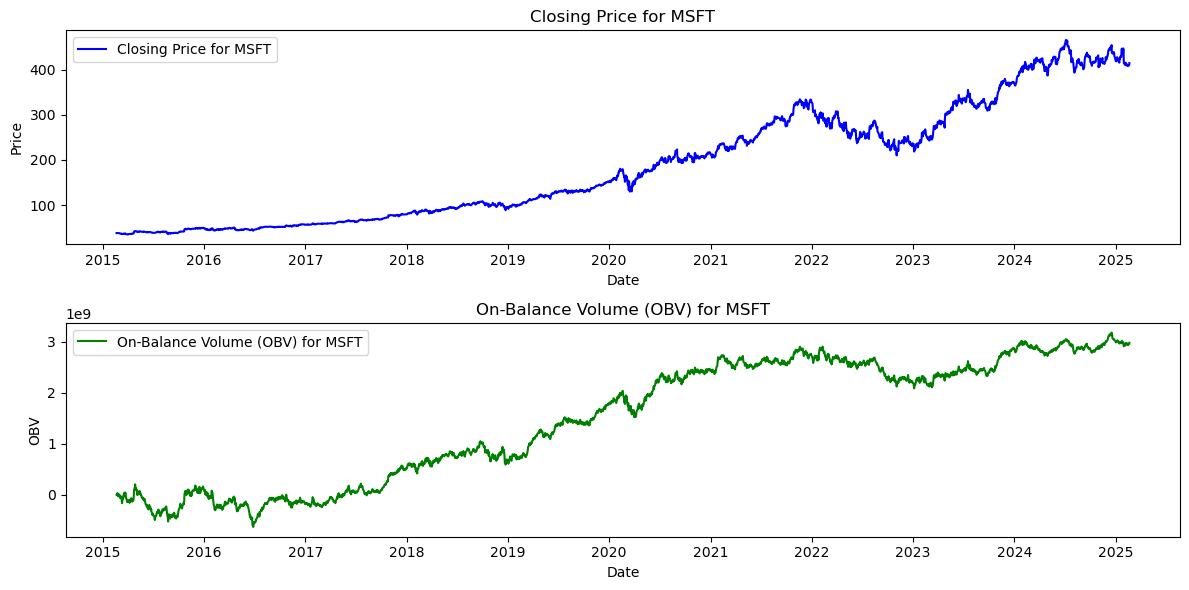

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Closing Price for {data["Ticker"][0]}')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

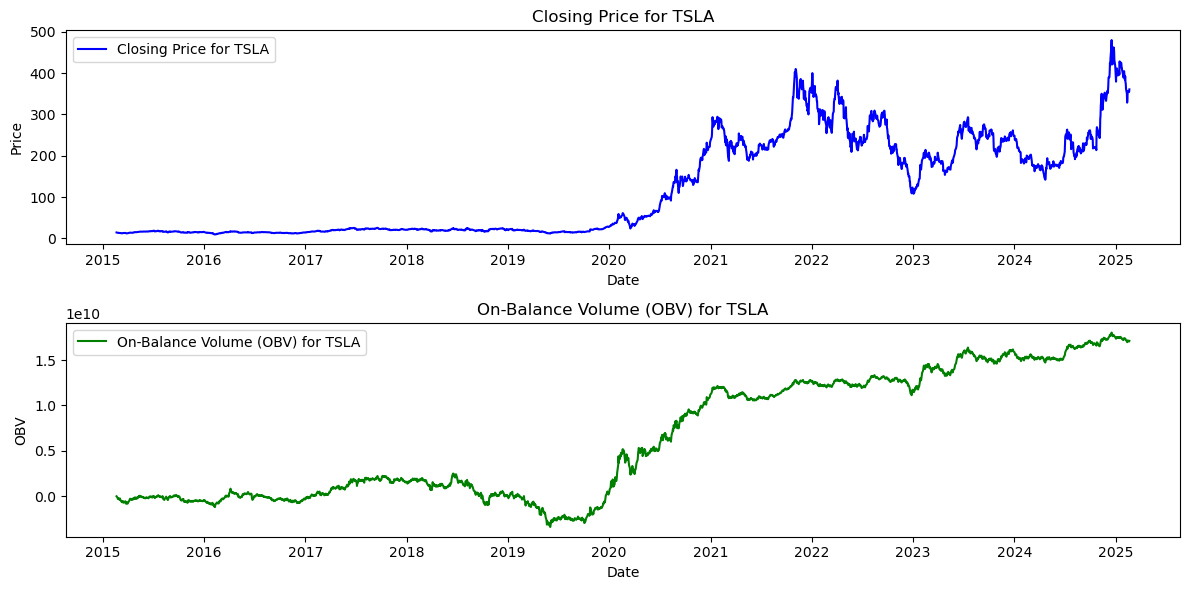

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Closing Price for {data["Ticker"][0]}')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

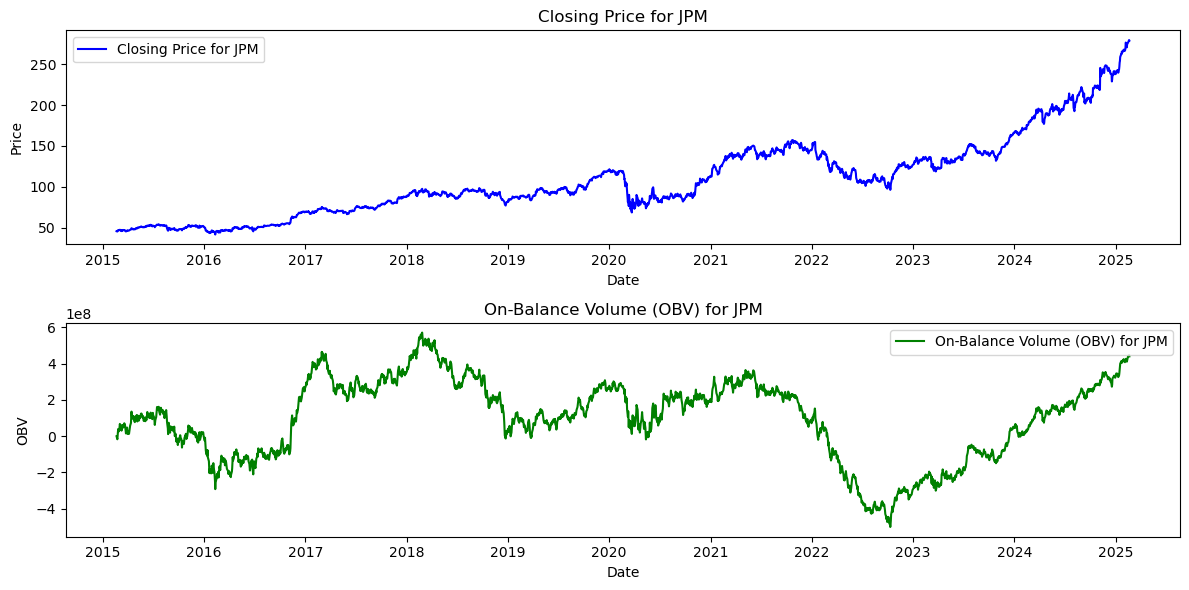

/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Closing Price for {data["Ticker"][0]}')
/var/folders/vw/fk4p6s510g7dfnhknk592c7r0000gn/T/ipykernel_88543/1316983030.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

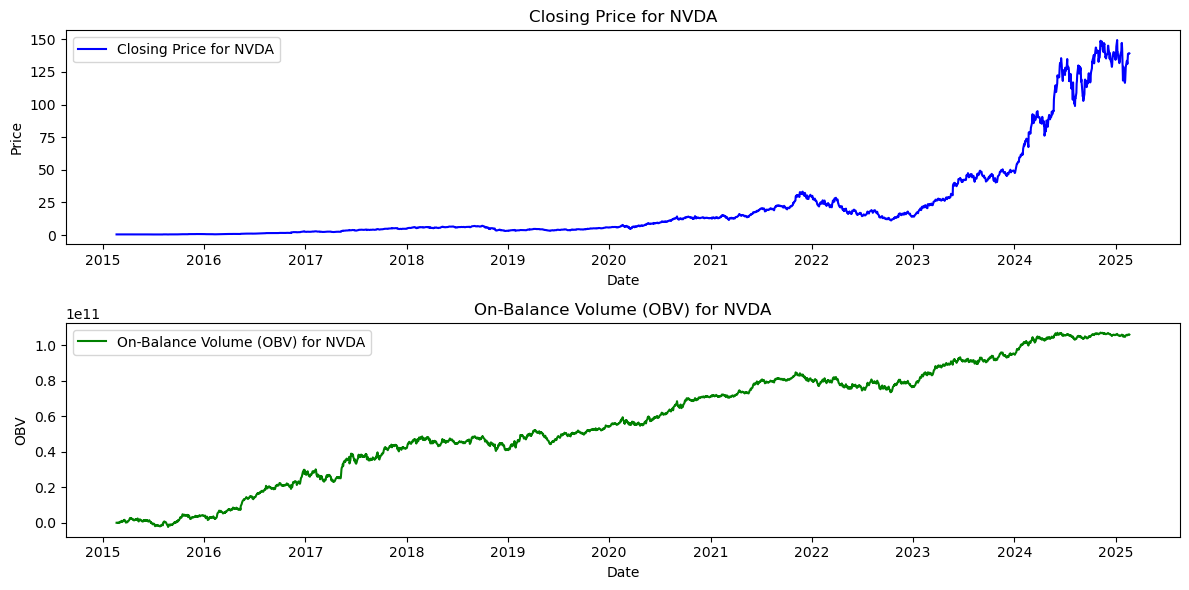

In [21]:
# Calculate price change direction (+1, -1, or 0)
for data in data_list:
    data['Price_Change'] = np.sign(data['Close'].diff().fillna(0))
    # Calculate OBV
    data['OBV'] = (data['Price_Change'] * data['Volume']).fillna(0).cumsum()
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)  # Create a subplot for the closing price
    plt.plot(data['Close'], label=f'Closing Price for {data["Ticker"][0]}', color='blue')
    plt.title(f'Closing Price for {data["Ticker"][0]}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Plotting the OBV
    plt.subplot(2, 1, 2)  # Create a subplot for the OBV
    plt.plot(data['OBV'], label=f'On-Balance Volume (OBV) for {data["Ticker"][0]}', color='green')
    plt.title(f'On-Balance Volume (OBV) for {data["Ticker"][0]}')
    plt.xlabel('Date')
    plt.ylabel('OBV')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [22]:
all_stock_prices = pd.concat(data_list)

In [24]:
all_stock_prices.reset_index(inplace=True)

In [26]:
all_stock_prices.to_csv("all_stocks.csv")